In [88]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnt

In [89]:
def g(lamb, mu, sig1, sig2):
    condition = lamb < mu
    sig = np.where(condition, sig1, sig2)
    return np.exp(-0.5 * ((lamb - mu) / sig)**2)

def x(lamb):
    return 1.056 * g(lamb, 599.8, 37.9, 31.0) + 0.362*g(lamb, 442.0, 16.0, 26.7) - 0.065*g(lamb, 501.1, 20.4, 26.2)
def y(lamb):
    return 0.821* g(lamb, 568.8, 46.9, 40.5) + 0.286 * g(lamb, 530.9, 16.3, 31.1)
def z(lamb):
    return 1.217 * g(lamb, 437.0, 11.8, 36.0) + 0.681 * g(lamb, 459.0, 26.0, 13.8)

def calcXYZ(lambdas, intensities):
    X = np.trapz(intensities * x(lambdas), lambdas)
    Y = np.trapz(intensities * y(lambdas), lambdas)
    Z = np.trapz(intensities * z(lambdas), lambdas)

    xx = X/(X+Y+Z)
    yy = Y/(X+Y*Z)
    zz = 1-xx-yy
    return xx, yy, zz

In [90]:
def black_body_spec(lamb, T):
    lamb2 = lamb * 1e-9
    return 2 * cnt.h * cnt.c ** 2 / (lamb2 ** 5 * (np.exp(cnt.h * cnt.c / (lamb2 * cnt.k * T)) - 1))

(0.34489585074509777, 8.627621327383333e-16, 0.6551041492549013)


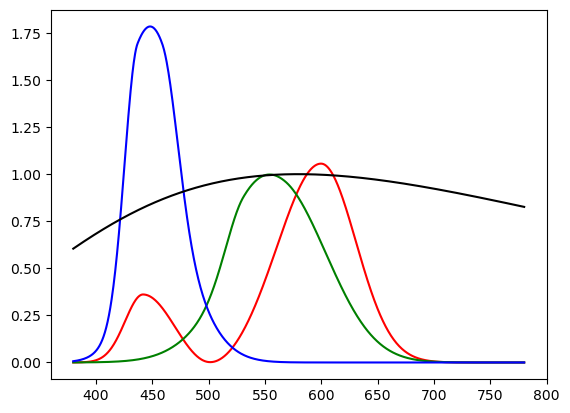

In [91]:
lambdas = np.linspace(380, 780, 1000)
xs = x(lambdas)
ys = y(lambdas)
zs = z(lambdas)
bbs = black_body_spec(lambdas, 5000)

print(calcXYZ(lambdas, bbs))

fig, ax = plt.subplots()
ax.plot(lambdas, xs, 'r')
ax.plot(lambdas, ys, 'g')
ax.plot(lambdas, zs, 'b')
ax.plot(lambdas, bbs / np.max(bbs), 'k')


[(0.0, 1.0), (0.0, 1.0)]

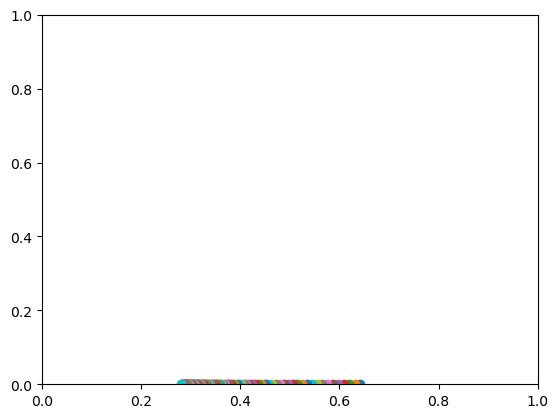

In [94]:
fig2, ax2 = plt.subplots()

for t in np.linspace(1000, 10000, 100):
    lambdas = np.linspace(380, 780, 1000)
    xs,ys,zs = (calcXYZ(lambdas,  black_body_spec(lambdas, t)))
    ax2.scatter(xs, ys)
ax2.set(xlim=[0,1], ylim=[0,1])